# Introduction

Nowadays booters are used a lot to perform DDoS-attacks. These booters make use of hacked websites. Previously, these DDoS booters mainly worked by infecting a lot of other machines, often called ‘infected zombie computers’. Nowadays, however, it has even become standard practice for hackers to leave booter shells within these hacked websites in order to launch DoD-attacks without the need for vast networks of infected computers, increasing the maliciousness of these attacks. This is made possible as (booter) shells are tiny “backdoor” programmes that let them add, delete and run files on compromised servers. These attacks through compromised Web Servers can be launched more readily and cause more damage than attacks through infected zombie computers, as these Web Servers have much more capacity than a workstation.


In this report we are going to analyze a dataset of the bootersite TWbooter that leaked in 2013. With this our goal is to gain insight in some of the statistics of this booter website. This way we can learn better how such booters work and what infrastructure it has regarding clients and attacks. This analysis to cover this is of great importance, as knowledge about booters’ characteristics and how their attacks are structured are vital information that is needed to mitigate these attacks.

# Methodology

We used qualitative research methods to answer our research questions. The dataset we used in our research came from a bootersite called TWbooter and was leaked in 2013. The final dataset we analyzed only consists of the attack table of the entire dataset. This attack table was filtered out by Mr. Santanna.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
attacks = pd.read_csv('table_attack_twbooter.csv', sep=';')
attacks.head(5)

,id,processid,victim,port_service`_type,type,duration,time,stopped,client_attacker,server_used_in_th_attack
0,1,5672,91.214.20.52,80,ESSYN,33,1358989954,1,1,94.102.49.76
1,2,29065,91.214.20.52,80,UDP,1783,1358990329,1,1,93.174.93.30
2,3,23005,78.31.8.124,80,ESSYN,393,1358991360,0,1,89.248.172.97
3,4,29411,199.204.44.188,80,ESSYN,60,1358995416,0,4,93.174.93.30
4,5,19298,http://chrome-mods.com,80,RUDY,50000,1358995471,1,3,72.9.144.80


## Helper functions

In [3]:
def days_between_epochs(e1, e2):
    d1 = dt.datetime.fromtimestamp(e1)
    d2 = dt.datetime.fromtimestamp(e2)
    return abs((d2 - d1))

# Results

## Question 1: What is the total number of attack records?

In [4]:
total_attacks = attacks.shape[0]
print(f"The total number of attack records is {total_attacks}")

The total number of attack records is 48773


## Question 2: What is the number of unique users present?

In [5]:
unique_users = attacks['client_attacker'].unique()
print(f"In the data collected, there are {len(unique_users)} unique users present.")

In the data collected, there are 277 unique users present.


## Question 3: What are the top 10 victim IP addresses?

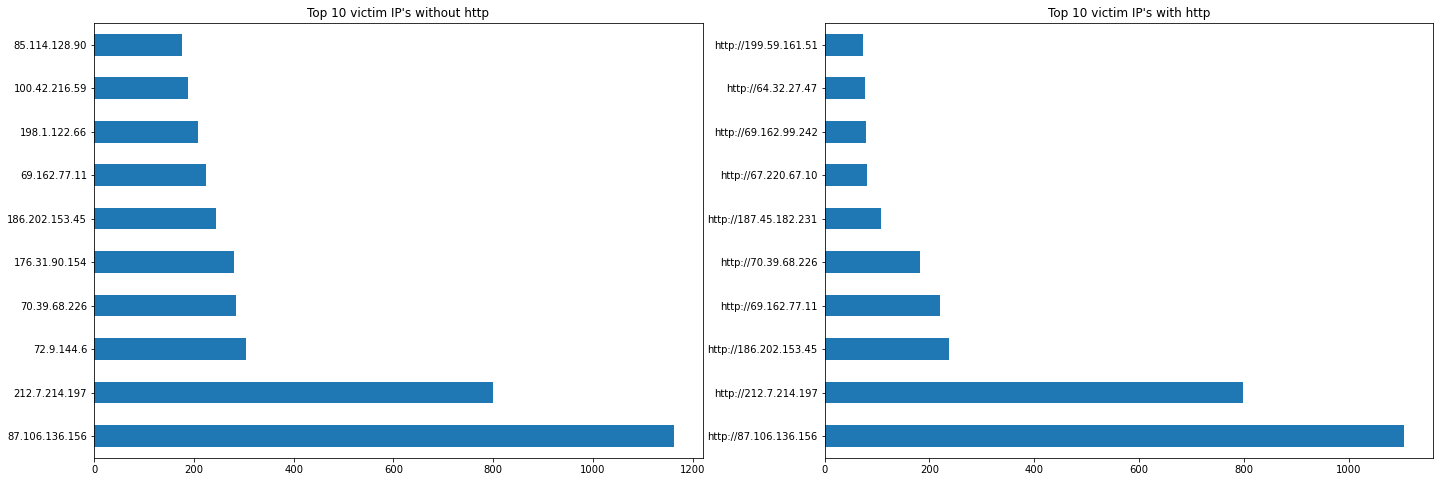

In [6]:
fig, axs = plt.subplots(1,2, figsize=(24, 8))

top_10_victim_ips = attacks['victim'].str.findall(r'(?:\d{1,3}\.)+(?:\d{1,3})').str[0].value_counts()
top_10_victim_ips_with_http = attacks['victim'].str.findall(r'http://(?:\d{1,3}\.)+(?:\d{1,3})').str[0].value_counts()
axs[0] = top_10_victim_ips[:10].plot(kind='barh', ax=axs[0])
axs[0].set_title('Top 10 victim IP\'s without http')
axs[1] = top_10_victim_ips_with_http[:10].plot(kind='barh', ax=axs[1])
axs[1].set_title('Top 10 victim IP\'s with http')

plt.show()

## Question 4: What are the top 10 most attacked domains?

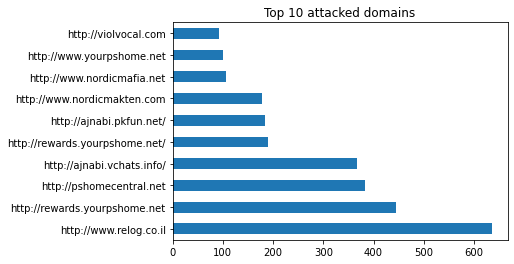

In [7]:
fig, ax = plt.subplots(1)
top_10_victim_domains = attacks['victim'][attacks['victim'].str.match(r'(?:http(?:s?)://)?(?:[\w]+\.)+[a-zA-Z]+(?::\d{1,5})?')].value_counts()
ax = top_10_victim_domains[:10].plot(kind='barh',ax=ax)
ax.set_title('Top 10 attacked domains')
plt.show()

## Question 5: What is the maximum attack duration?

In [8]:
max_attack_duration = max(attacks['duration'])
max_attack_timedelta = dt.timedelta(seconds=int(max_attack_duration))
print(f"The maximum attack duration in this dataset was {max_attack_duration} seconds, or {max_attack_timedelta}")

The maximum attack duration in this dataset was 500000 seconds, or 5 days, 18:53:20


## Question 6: What are the top 3 attack types?

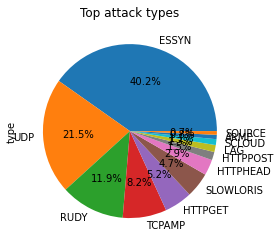

In [9]:
fig, ax = plt.subplots(1)
top_attack_types = attacks['type'].value_counts()
ax = top_attack_types.plot(kind='pie', ax=ax,autopct='%1.1f%%')
ax.set_title('Top attack types')
plt.show()

## Question 7: Which owner id performed the most attacks?

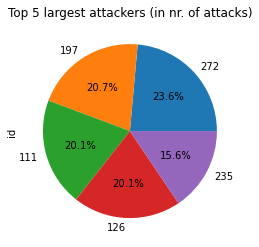

In [35]:
fig, ax = plt.subplots(1)
largest_attackers = attacks.groupby(['client_attacker'])['id'].count().sort_values(ascending=False)
largest_attackers[:5].plot(kind='pie', ax=ax, autopct='%1.1f%%')
ax.set_title('Top 5 largest attackers (in nr. of attacks)')
plt.show()

## Question 8: How many attacks has krebsonsecurity suffered?

In [11]:
krebson_attacks = attacks[(attacks['victim'] == 'http://krebsonsecurity.com') | (attacks['victim']== 'http://www.krebsonsecurity.com') | (attacks['victim'] == 'http://krebsonsecurity.com/')]
krebson_total = krebson_attacks.shape[0]
krebson_duration = dt.timedelta(seconds=int(krebson_attacks['duration'].sum()))
print(f"The website krebsonsecurity.com was attacked {krebson_total} times, with a total duration of {krebson_duration}")

The website krebsonsecurity.com was attacked 15 times, with a total duration of 1 day, 6:00:00


## Question 9.1: What was the total lifetime of this booter? 

In [125]:
booter_lifetime = days_between_epochs(max(attacks['time']), min(attacks['time']))
print(f"The total lifetime of this booter, calculated from the difference between the time of the first & last attack is:\n{str(booter_lifetime)}")

The total lifetime of this booter, calculated from the difference between the time of the first & last attack is:
50 days, 11:32:42


## Question 9.2: Who where the top 3 attackers who attacked the longest?

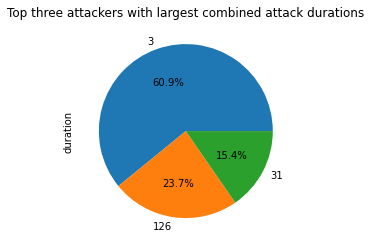

In [126]:
fig, ax = plt.subplots(1)
longest_attackers = attacks.groupby(['client_attacker'])['duration'].sum().sort_values(ascending=False)[:3]
longest_attackers.plot(kind='pie', ax=ax, autopct='%1.1f%%')
ax.set_title('Top three attackers with largest combined attack durations')
plt.show()

## Question 9.3: Who where the top 10 attackers whose attacks where stopped the most?

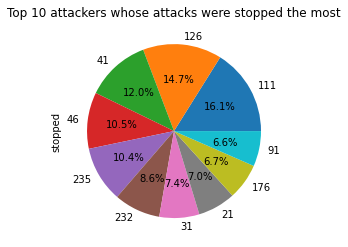

In [127]:
fig, ax = plt.subplots(1)
top_10_stopped_attackers = attacks.groupby('client_attacker')['stopped'].sum().sort_values(ascending=False)[:10]
top_10_stopped_attackers.plot(kind='pie',ax=ax,autopct='%1.1f%%')
ax.set_title('Top 10 attackers whose attacks were stopped the most')
plt.show()

## Question 9.4: What is the total duration of all attacks combined?

In [130]:
total_attack_duration = dt.timedelta(seconds=int(attacks['duration'].sum()))
print(f"The total duration of all attacks combined equals {total_attack_duration}")

The total duration of all attacks combined equals 1171 days, 13:08:52


# Conclusion

conclusie hier nog